# EDA — Task 1: Google Play Reviews

This notebook performs quick exploratory data analysis on the cleaned reviews dataset produced by `scripts/preprocess_reviews.py`.

It includes: ratings distribution, sentiment analysis (VADER), and top issue words for negative reviews. Run cells in order.

In [1]:
# Install optional dependencies used by this notebook (only if missing).
# Run this cell only if you want the notebook to install dependencies automatically.
import sys
import subprocess
pkgs = ['vaderSentiment', 'matplotlib', 'seaborn', 'nltk', 'wordcloud']
try:
    import vaderSentiment
except Exception:
    subprocess.check_call([sys.executable, '-m', 'pip', 'install'] + pkgs)
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nesre\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import os

print("Current Python Working Directory:", os.getcwd())

target_path = '../data/processed/reviews_clean.csv'
if os.path.exists(target_path):
    print(f"✅ Success! Found file at: {target_path}")
else:
    print(f"❌ Error! Could not find: {target_path}")
    
    # 3. Help find where the data actually is
    print("\n--- Diagnostic ---")
    if os.path.exists('data'):
        print("Found 'data' folder. Contents:", os.listdir('data'))
        if os.path.exists('data/processed'):
            print("Found 'data/processed' folder. Contents:", os.listdir('data/processed'))
        else:
            print("❌ Found 'data' folder, but NOT 'data/processed'.")
    else:
        print("❌ Python does not see a 'data' folder here.")
        print("You might need to move up a folder using '../data/processed/...'")

Current Python Working Directory: c:\Users\nesre\Desktop\10 Acadamey\tenx KAIM 8\Customer Experience Analytics for Fintech Apps\notebooks
✅ Success! Found file at: ../data/processed/reviews_clean.csv


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from collections import Counter
import re

DATA_PATH = '../data/processed/reviews_clean.csv'
df = pd.read_csv(DATA_PATH) 
print('Loaded', DATA_PATH, '->', df.shape, 'rows x cols')
df.head()

Loaded ../data/processed/reviews_clean.csv -> (966, 7) rows x cols


,review,rating,date,bank,source,vader,sentiment_label
0,i don't find it good and now it is not working!,1,2025-12-01,BOA,google_play,-0.4015,neg
1,Make the reason we wrote visible on app transa...,2,2025-12-01,BOA,google_play,0.0000,neu
2,app is note active working crash,1,2025-11-30,BOA,google_play,0.0000,neu
3,🙏👍,5,2025-11-29,BOA,google_play,0.0000,neu
4,Very Good,5,2025-11-28,BOA,google_play,0.4927,pos


C:\Users\nesre\AppData\Local\Temp\ipykernel_15000\1337593131.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating', data=df, palette='viridis')


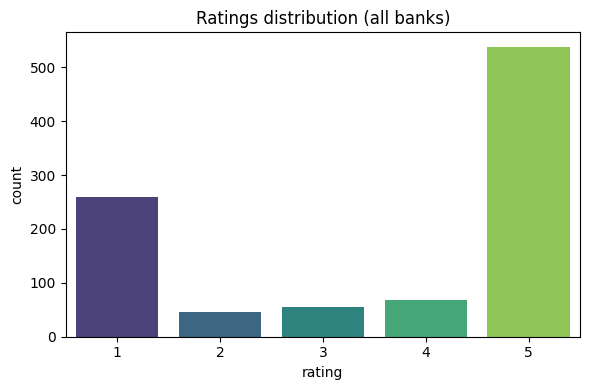

In [8]:
# Ratings distribution
plt.figure(figsize=(6,4))
sns.countplot(x='rating', data=df, palette='viridis')
plt.title('Ratings distribution (all banks)')
plt.tight_layout()
plt.show()

In [9]:
# Sentiment analysis with VADER
analyzer = SentimentIntensityAnalyzer()
df['vader'] = df['review'].astype(str).apply(lambda t: analyzer.polarity_scores(t)['compound'])
# Label sentiment
df['sentiment_label'] = df['vader'].apply(lambda s: 'pos' if s >= 0.05 else ('neg' if s <= -0.05 else 'neu'))
df.groupby('sentiment_label').size()

sentiment_label
neg    161
neu    337
pos    468
dtype: int64

In [10]:
# Sentiment distribution by bank
pd.crosstab(df['bank'], df['sentiment_label'], normalize='index').round(3)

sentiment_label,neg,neu,pos
bank,,,
BOA,0.220,0.349,0.431
CBE,0.098,0.436,0.466
DASHEN,0.174,0.264,0.563


In [11]:
# Top words in negative reviews per bank
stop = set(stopwords.words('english'))
regex = re.compile(r"[^a-zA-Z\\s]")
for bank in sorted(df['bank'].unique()):
    neg = df[(df['bank']==bank) & (df['sentiment_label']=='neg')]['review'].astype(str)
    words = Counter()
    for text in neg:
        text = regex.sub(' ', text).lower()
        for w in text.split():
            if len(w) > 2 and w not in stop:
                words[w] += 1
    top = words.most_common(15)
    print('\nTop negative words for', bank)
    for w,c in top:
        print(f'{w}: {c}')


Top negative words for BOA
app: 59
worst: 20
bank: 13
time: 12
ever: 11
fix: 11
times: 10
banking: 9
work: 9
mobile: 9
problem: 8
even: 8
bad: 7
experience: 7
money: 7

Top negative words for CBE
app: 16
cbe: 5
branch: 5
bad: 4
bank: 4
update: 4
service: 4
even: 4
pin: 4
get: 3
android: 3
users: 3
like: 3
working: 3
work: 3

Top negative words for DASHEN
app: 41
worst: 13
bank: 12
ever: 10
banking: 8
like: 7
time: 6
slow: 6
even: 6
account: 6
mobile: 6
bill: 5
working: 5
apps: 5
use: 5
